We’ll be working with two years of the bicycle sharing systems for New York City (Citibike). The dataset contains daily bike trip counts, along with daily measurements on environmental and seasonal information that may affect the bikesharing.

Here’s information on what the variables mean.

- trips - daily total number of bike trips taken (all stations)
- precipitation - daily inches of rain
- snow_depth - daily inches of snow. Accoding to NOAA "Determine the depth of the new and old snow remaining on the ground at observation time".
- snowfall - according to NOAA "Measure and record the snowfall (snow, ice pellets ) since the previous snowfall observation (24 hours)."
- max_temperature - daily maximum temperature in Farenheit (highest temperature reached)
- min_temperature - daily minimum temperature in Farenheit (lowest temperature reached)
- average_wind_speed - measured hourly in mph and averaged for daily value
- year 
- holiday
    - True
    - False
- stations in service - docking stations working per day
- weekday
    - True
    - False
- weekday_non_holiday
    - True
    - False

More details on snow measurements [here](https://www.weather.gov/gsp/snow)

In [1]:
# All the libraries that we will need
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
%matplotlib inline

### Exercise 1: Data pre-processing 

Let's start by loading and pre-processing our dataset.

a) Load the `bikes` dataset into a dataframe called `bikes`, and print the first five rows [2pt]

In [2]:
bikes = pd.read_csv("citibike.csv")
bikes.head(5)

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,20138,0.649606,0.0,0.0,75.92,66.02,2.90802,2013,summer,8,False,329,True,True
1,35792,0.000000,0.0,0.0,82.94,66.92,4.47387,2013,summer,8,False,329,True,True
2,29540,0.059055,0.0,0.0,78.08,68.00,3.35540,2013,summer,8,False,329,False,False
3,35253,0.000000,0.0,0.0,80.06,66.02,5.14495,2013,summer,8,False,329,False,False
4,36776,0.000000,0.0,0.0,78.08,62.06,3.35540,2013,summer,8,False,329,True,True


b) Check that there are no missing values in your dataset. If they are, take care of them appropriately


In [3]:
# Find columns with missing values
bikes.isna().sum()

trips                  0
precipitation          0
snow_depth             0
snowfall               0
max_temperature        0
min_temperature        0
average_wind_speed     3
year                   0
season                 0
month                  0
holiday                0
stations_in_service    0
weekday                0
weekday_non_holiday    0
dtype: int64

In [4]:
# Fill missing values in average_wind_speed with mean value
bikes['average_wind_speed'].fillna(bikes['average_wind_speed'].mean(), inplace = True)

c) Separate your dataset into two dataframe. One dataframe should contain the data for weekends and the other one for weekdays

In [5]:
bikes_weekday = bikes[bikes['weekday'] == True]
bikes_weekend = bikes[bikes['weekday'] == False]

d) Let's look at the number of bicycle rental (trips) per season! Draw a boxplot that displays this information for the whole dataset. As subplots, draw the boxplots for weekdays and weekends. Is there a differece in the distribution of trips between seasons? Is there a difference between weekdays and weekends? Explain.

<AxesSubplot:xlabel='season', ylabel='trips'>

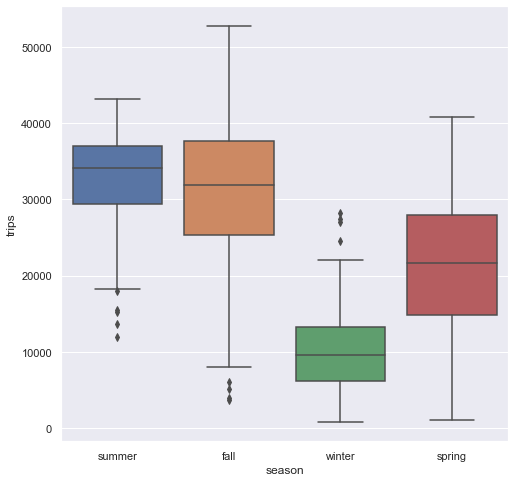

In [6]:
# For the entire dataset
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(x="season", y="trips", data=bikes)

<AxesSubplot:xlabel='season', ylabel='trips'>

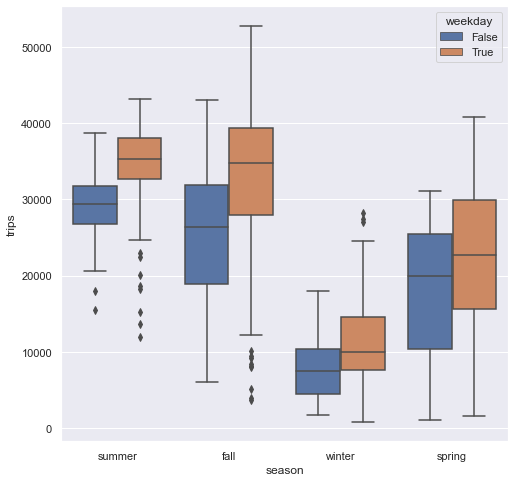

In [7]:
# For weekdays and weekends
# Dispalyed in the same plot to aid comparison
sns.boxplot(x="season", y="trips", hue="weekday",data=bikes)

For the entire dataset : <br>
As expected, the maximum number of trips can be noticed during Summer with the median around 3500 and Fall with the median around 3200, followed by Spring with the median around 2100. Winter saw the least number of trips with the median around 1000. 

For weekdays and weekends : <br>
For both weekdays and weekends, the number of trips follows the general trend of being maximum during summer, followed closely by fall, spring and winter. Generally, across all seasons, the number of trips during weekdays is more when compared to weekends as expected.

## Exercise 2: Qualitative predictors

The Season variable is an example of what’s called a categorical predictor. This problem gets to fit a model with a qualitative predictor and to interpret the findings.

a) Fit a linear regression model with trips as the response variable and season as your predictor, and print the summary of this linear regression model. Use your weekdays dataset.


In [8]:
import statsmodels.formula.api as smf

In [9]:
model = smf.ols(formula='trips ~ season', data=bikes_weekday).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     261.4
Date:                Wed, 30 Mar 2022   Prob (F-statistic):          1.07e-108
Time:                        21:17:24   Log-Likelihood:                -6333.7
No. Observations:                 608   AIC:                         1.268e+04
Df Residuals:                     604   BIC:                         1.269e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.353e+04    581.221  

b) How many total coefficients are there in the model? What does each coefficient correspond to?

There are four coefficients in the model correspoding to three categories of seasons, spring, summer, winter and the y-intercept. There's no coefficient corresponding to Fall because it is the reference category to which all other categories are compared to.

c) Interpret the coefficients of season in the model. Make sure to use an example in your interpretation, related to the bikes.

Each coefficient term denotes the change in Y for a unit change in corresponding X i.e trips reduces by 10960 if it's Spring, raises by 918.6325 if it's summer and again falls by 22310 if it's winter. The coefficients corresponding to spring and winter have a negative linear association with trips while the coefficent corresponding to summer has a positive linear association.<br>
The regression equation is formulated as : <br><br>
$trips = - 10960(spring) + 918.6325(summer) - 22310(winter) + 33530$<br><br>
For example, When it's Spring : <br><br>
$trips = - 10960(1) + 918.6325(0) - 22310(0) + 33530$<br>
$trips = 22570$


d) Repeat a) -> c) with your weekends dataset. What difference can you see?

In [10]:
model = smf.ols(formula='trips ~ season', data=bikes_weekend).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     105.3
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.60e-43
Time:                        21:17:30   Log-Likelihood:                -2499.5
No. Observations:                 244   AIC:                             5007.
Df Residuals:                     240   BIC:                             5021.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.577e+04    776.459  

There are four coefficients in the model correspoding to three categories of seasons, spring, summer, winter and the y-intercept. There's no coefficient corresponding to Fall because it is the reference category to which all other categories are compared to.<br><br>
Though the coefficients differ by value, here too the coefficients corresponding to spring and winter have a negative linear association with trips while the coefficent corresponding to summer has a positive linear association.<br><br>
The regression equation is formulated as : <br><br>
$trips = - 7298.8590(spring) + 3360.9529(summer) - 17930(winter) + 25770$<br><br>

## Exercise 3: Multiple linear regression

In this problem we’ll practice fitting and interpreting the results of a multiple linear regression. For this question use the weekdays dataset.

a) Fit a regression model with trips as the response variable and the following predictors as features: snow_depth, snowfall, min_temperature, max_temperature, precipitation, month.


In [11]:
model = smf.ols(formula='trips ~ snow_depth + snowfall + min_temperature + max_temperature + precipitation + month', data=bikes_weekday).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     332.2
Date:                Wed, 30 Mar 2022   Prob (F-statistic):          3.70e-187
Time:                        21:17:32   Log-Likelihood:                -6142.1
No. Observations:                 608   AIC:                         1.230e+04
Df Residuals:                     601   BIC:                         1.233e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5252.4304   1205.888     

b) Interpret the coefficients of snow_depth, snowfall, min_temperature, max_temperature, precipitation, month in the model.

Each coefficient term denotes the change in Y for a unit change in corresponding X i.e if snow_depth rises by 1 unit then trips falls by 280.4113, if snowfall raises by 1 then trips falls by 71.3863, if min_temperature raises by 1 then trips falls by 11.1556, if max_temperature raises by 1 then trips raises by 460.9413, if precipitation raises by 1 then trips falls by 8226.5494 and as each month progresses trips raises by 661.0439.<br><br>
The coefficients corresponding snow_depth, snowfall, min_temperature and max_temperature have a negative linear association with trips while the coefficients corresponding to max_temperature and months have a positive linear association with trips.<br><br>
The regression equation can be formulated as :<br><br>
$trips = - 280.4113(snow$ _ $depth) - 71.3863(snowfall) - 11.1556(min$ _ $temperature) + 460.9413(max$ _ $temperature) -8226.5494(precipitation) + 661.0439(months) - 5252.4304$

c) Re-run the model from 3)a) but add another predictor of your choice. Justify your choice of predictor. Did this make any difference? Did the R-squared of the model improve?

In [12]:
model = smf.ols(formula='trips ~ snow_depth + snowfall + min_temperature + max_temperature + precipitation + month + holiday', data=bikes_weekday).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     339.7
Date:                Wed, 30 Mar 2022   Prob (F-statistic):          5.11e-204
Time:                        21:17:34   Log-Likelihood:                -6099.6
No. Observations:                 608   AIC:                         1.222e+04
Df Residuals:                     600   BIC:                         1.225e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -4140.1613   1131.658     

'holiday' has been chosen as a predictor since people usually stay at home during holidays and do not use bikes. This clear distinction makes it a suitable choice for a predictor. Adding it as a predictor raises the R-squared score of the model by 3%.

d) From c) which predictors are associated with increased ridership? Which predictors are associated with decreased ridership?

'holiday', 'max_temperature' and 'month' are associated with increased ridership.<br>
'snow_depth', 'snowfall', 'min_temperature' and 'precipitation' are asscociated with decreased ridership.

e) Which predictors are statistically significant (95% confidence level)?

'holiday', 'snow_depth' , max_tempearture', 'precipitation' and 'month' are statistically significant.

## Exercise 4: Dealing with collinearity 

Highly correlated predictors can make interpreting regression coefficients problematic (they do not contribute relevant information for the model). Let’s evaluate this in our dataset. Continue using weekdays as your main dataset.

a) Check the variables used in Problem 3)a) to see if any of the predictors are highly correlated with one another. 

In [13]:
bikes_weekday[['snow_depth', 'snowfall', 'min_temperature', 'max_temperature', 'precipitation', 'month']].corr()

,snow_depth,snowfall,min_temperature,max_temperature,precipitation,month
snow_depth,1.000000,0.261811,-0.493187,-0.475653,0.022949,-0.439442
snowfall,0.261811,1.000000,-0.237841,-0.232368,0.237246,-0.215126
min_temperature,-0.493187,-0.237841,1.000000,0.968400,0.013444,0.381236
max_temperature,-0.475653,-0.232368,0.968400,1.000000,-0.011895,0.329866
precipitation,0.022949,0.237246,0.013444,-0.011895,1.000000,0.003059
month,-0.439442,-0.215126,0.381236,0.329866,0.003059,1.000000


It can be clearly seen that 'min_temperature' and 'max_temperature' are highly correlated.

b) Are any of the predictors highly correlated? Are you surprised that these predictors are highly correlated, or can you think of a reason for why it makes sense that they should be correlated?

It can be clearly seen that 'min_temperature' and 'max_temperature' are highly correlated. It makes sense that these predictors are highly correlated since for a day, if the minimum temperature falls, so does the maximum temperature and if it rises, the other rises too. 

c) Fit your regression model, but this time omit the max or min temperature variable. Display the coefficients table for this model.

In [14]:
# Omitting min temperature
model = smf.ols(formula='trips ~ snow_depth + snowfall + max_temperature + precipitation + month + holiday', data=bikes_weekday).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     397.0
Date:                Wed, 30 Mar 2022   Prob (F-statistic):          2.46e-205
Time:                        21:17:46   Log-Likelihood:                -6099.6
No. Observations:                 608   AIC:                         1.221e+04
Df Residuals:                     601   BIC:                         1.224e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -4119.6400   1015.575     

d) What is the coefficient of temperature in this new model? Is it very different from the temperature coefficient estimated in part 3)a)? Is it statistically significant? Explain your findings.

The coeffcient for max_temperature is 438.1444. It is only slightly different from the value found in 3. a). Yes, it is statistically significant.<br>
It can be seen that the coefficient for max_temperture has decreased. This is because min_temperature whose coefficient had a negative value was removed from the model and hence max temperature had to accomodate for it.


## Exercise 5: Exploring different models 

*Continue using weekdays as your dataset.*

a) Construct a scatterplot of trips ~ month. Describe what you see. Does a linear relationship appear to be a good way of modeling how bikeshare count varies with month? 

<AxesSubplot:xlabel='month', ylabel='trips'>

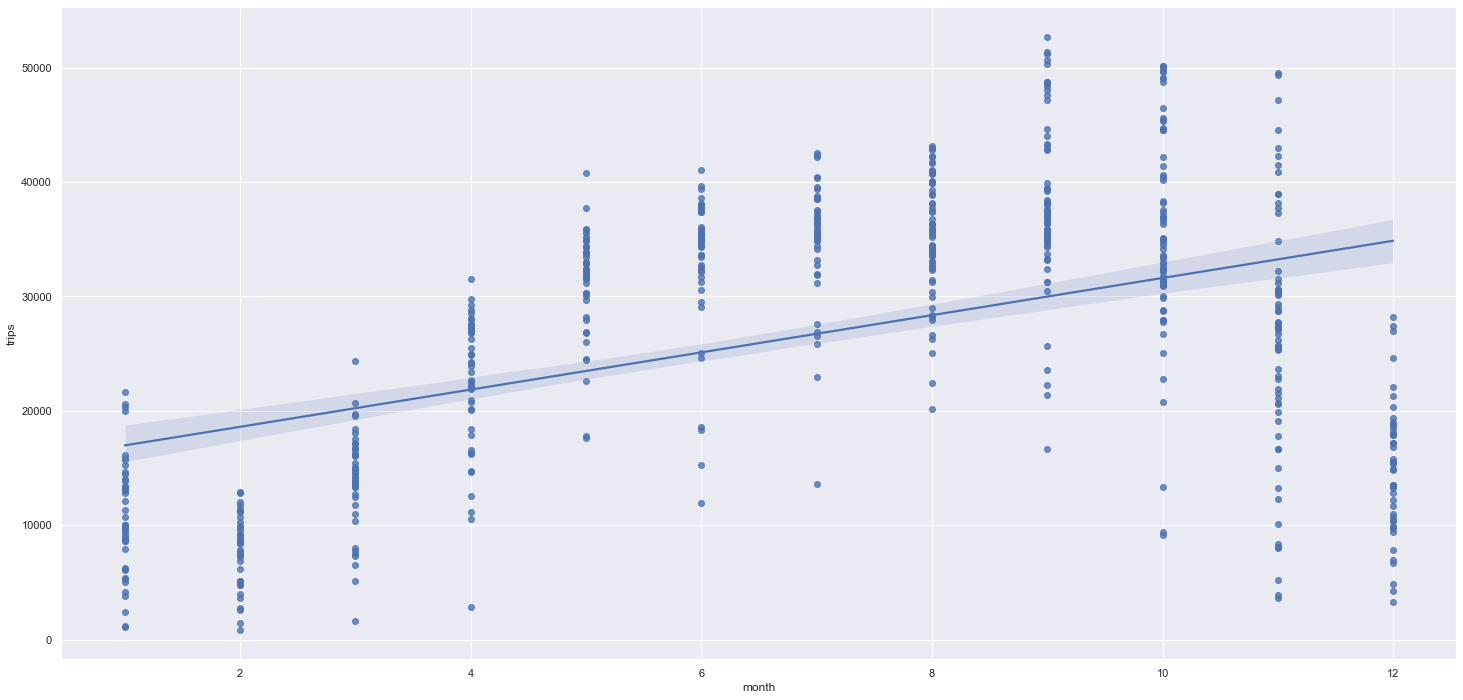

In [15]:
sns.set(rc={'figure.figsize':(25,12)})
sns.regplot(x='month', y='trips', data=bikes_weekday, order =1) 

From the graph, it can be seen that the relationship between trips and months is not linear. The average number of trips steadily rises through months 2 to 8 but decreases each month after that. The linear regression line plotted does not capture this variance very well as it indicates that the number of trips keep rising every month. So, a linear relationship does not appear to be a good way of modeling how bikeshare count varies with month.

b) Try out 3 different degrees of polynomial regression fits for modeling the relationship between trips and month. Do not do more than 3 models. Display all of them in the same plot (through subplots). Choose the subplot that appears to nicely capture the trends in the data. Be sure to print the $R^2$ or adjusted-$R^2$ for each subplot to help you with your decision. Explain your choice and include comments to explain your code.

Degree : 2
R2:  0.5959443998581235

Degree : 3
R2:  0.670728086920106

Degree : 4
R2:  0.6717163847885701


[Text(0.5, 1.0, 'Degree = 4')]

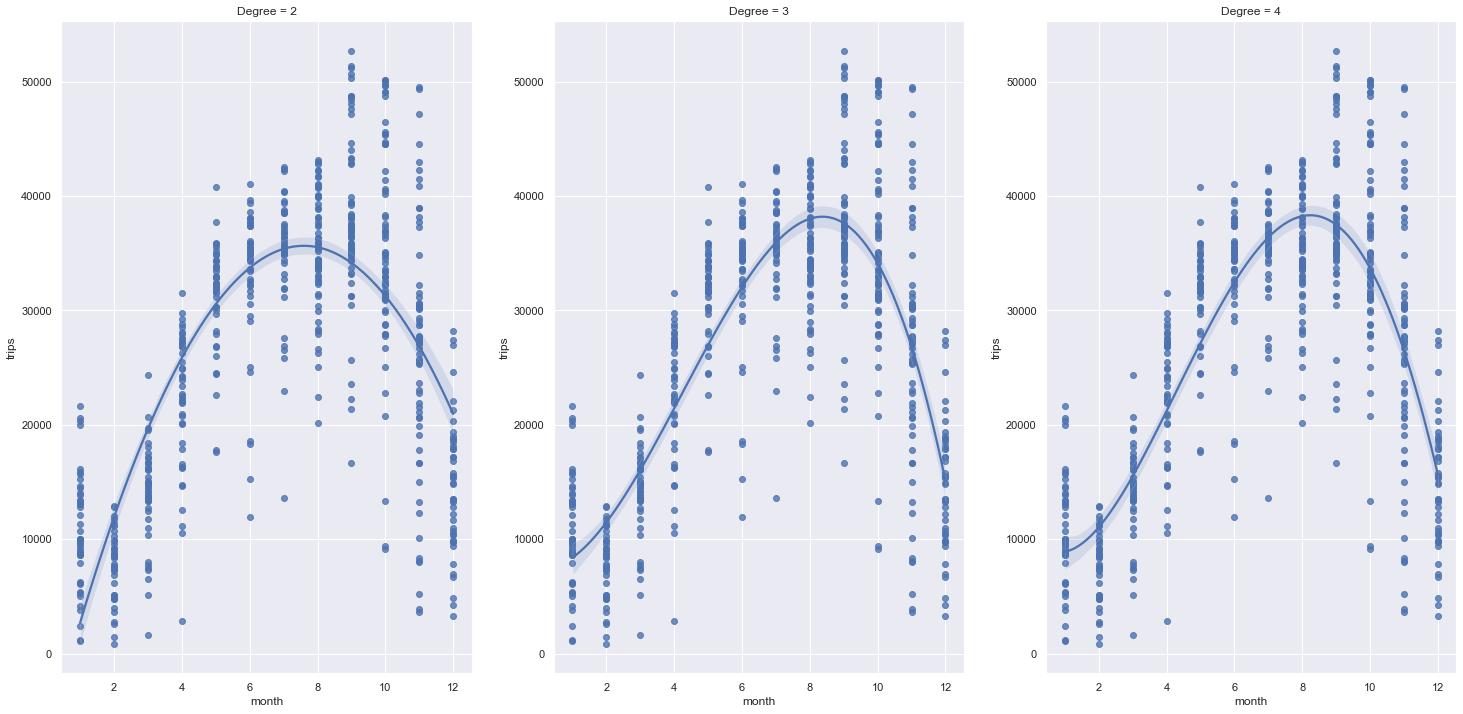

In [16]:

# Set X as the values for months and y as the values for trips
X = np.array(bikes_weekday['month']).reshape(-1, 1)
y = np.array(bikes_weekday['trips']).reshape(-1, 1)

#  Polynomial regression with degree 2
polynomial_features= PolynomialFeatures(degree = 2)
x2 = polynomial_features.fit_transform(X) # Transform X to degree 2
model2 = sm.OLS(y, x2).fit() # Fit the model with the transformed features
print("Degree : 2")
print("R2: ", model2.rsquared)
print()

#  Polynomial regression with degree 3
polynomial_features= PolynomialFeatures(degree = 3)
x3 = polynomial_features.fit_transform(X) # Transform X to degree 3
model3 = sm.OLS(y, x3).fit() # Fit the model with the transformed features
print("Degree : 3")
print("R2: ", model3.rsquared)
print()

#  Polynomial regression with degree 4
polynomial_features= PolynomialFeatures(degree = 4)
x4 = polynomial_features.fit_transform(X) # Transform X to degree 3
model4 = sm.OLS(y, x4).fit() # Fit the model with the transformed features
print("Degree : 4")
print("R2: ", model4.rsquared)

# Plot the results of polynomial regression
fig, axes = plt.subplots(1, 3)

sns.regplot(x='month', y='trips', data=bikes_weekday, order =2, ax=axes[0]).set(title = "Degree = 2")
sns.regplot(x='month', y='trips', data=bikes_weekday, order =3, ax=axes[1]).set(title = "Degree = 3")
sns.regplot(x='month', y='trips', data=bikes_weekday, order =4, ax=axes[2]).set(title = "Degree = 4")


The trend is captured best when X is transformed to degree 3. There's not much difference between the R-squared values of degree 3 and 4. So 3 is chosen to avoid overfitting (as could happen with degree 4). This decision is also supported by the graphs plotted.

c) Repeat b) to determine appropriate degree polynomials for modeling the relationship between trip and the other inputs: temperature (pick one), snow (also pick one) and precipitation (i.e., trips ~ temperature, trips ~ snow, and trips ~precipitation). Justify your choices and include comment on your code. (Note: your polynomials can have different degrees for different features)

<AxesSubplot:xlabel='max_temperature', ylabel='trips'>

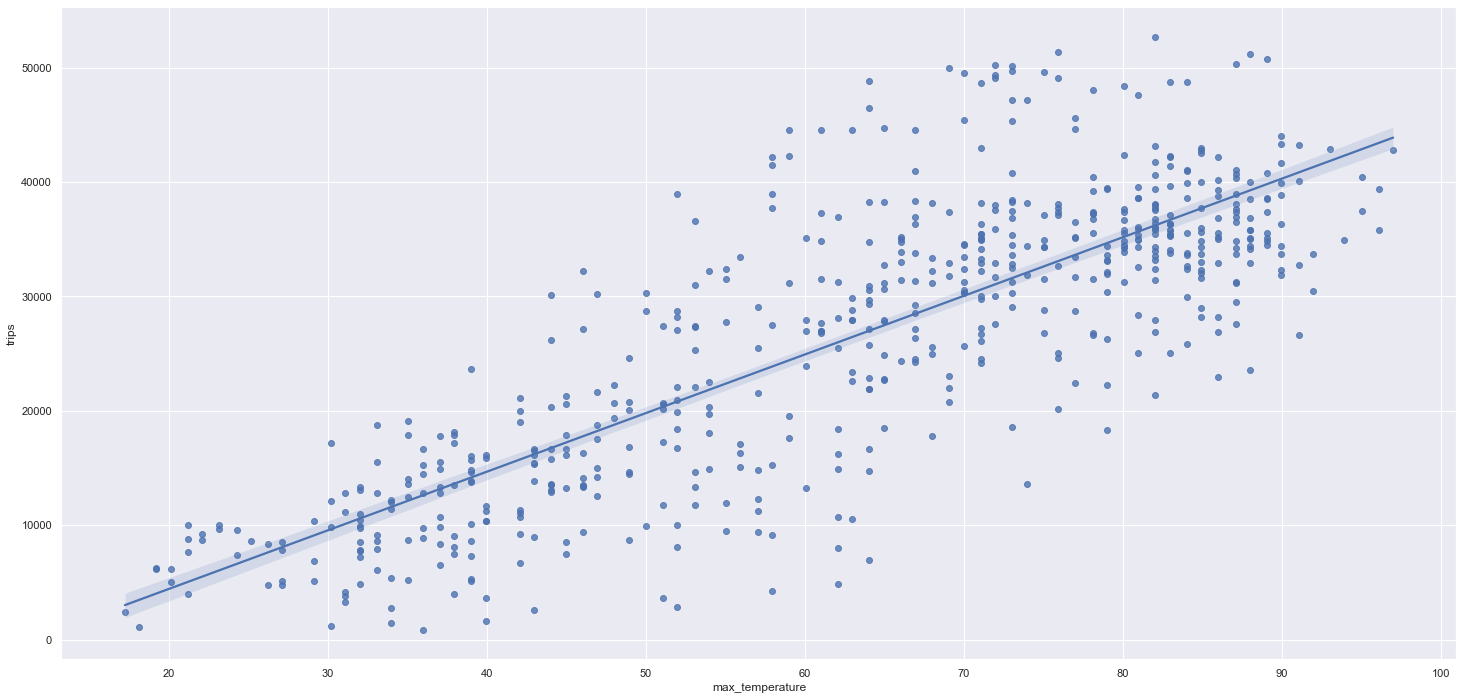

In [17]:
# Temperature (degree 1)
sns.regplot(x='max_temperature', y='trips', data=bikes_weekday, order =1) 


Degree : 2
R2:  0.6694146420004946

Degree : 3
R2:  0.6840705461278922

Degree : 4
R2:  0.6841917302212198


[Text(0.5, 1.0, 'Degree = 4')]

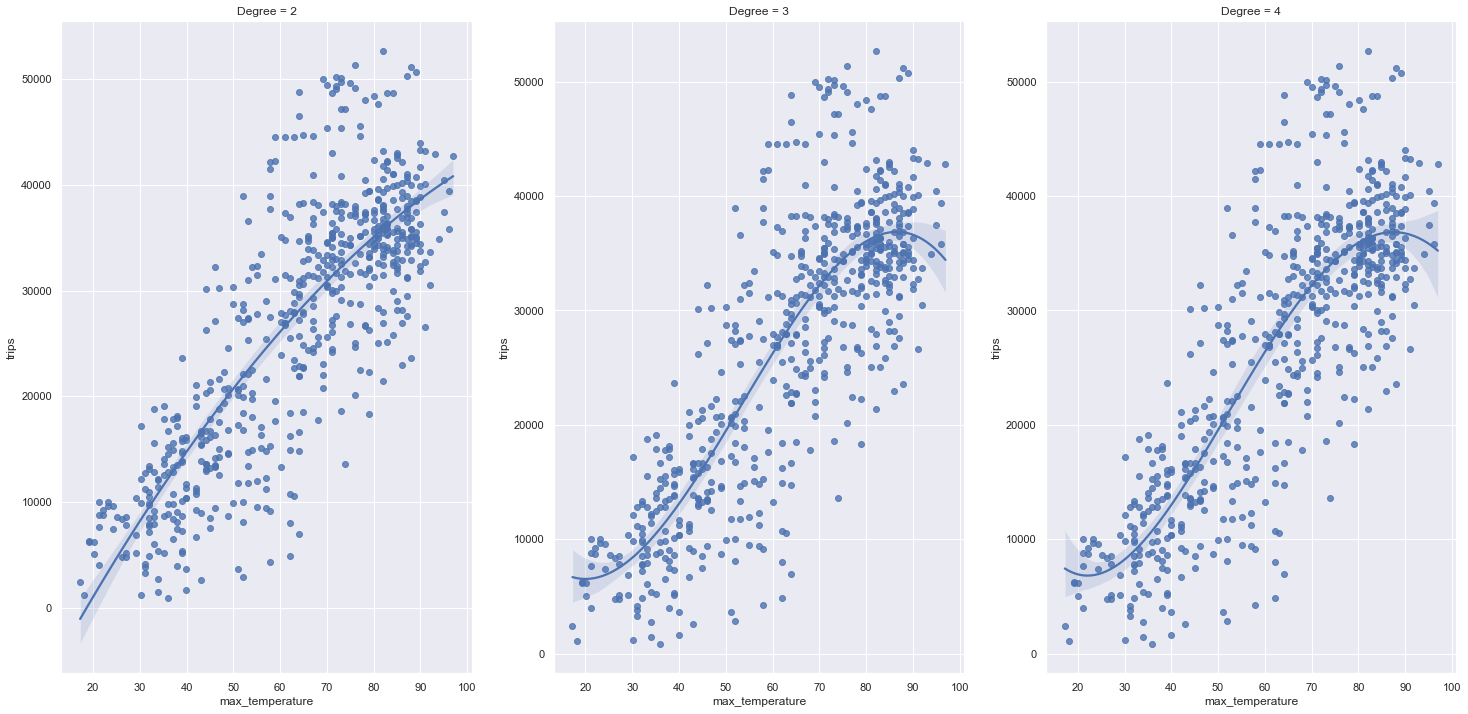

In [18]:
# Set X as the values for temperature and y as the values for trips
X = np.array(bikes_weekday['max_temperature']).reshape(-1, 1)
y = np.array(bikes_weekday['trips']).reshape(-1, 1)

#  Polynomial regression with degree 2
polynomial_features= PolynomialFeatures(degree = 2)
x2 = polynomial_features.fit_transform(X) # Transform X to degree 2
model2 = sm.OLS(y, x2).fit() # Fit the model with the transformed features
print("Degree : 2")
print("R2: ", model2.rsquared)
print()

#  Polynomial regression with degree 3
polynomial_features= PolynomialFeatures(degree = 3)
x3 = polynomial_features.fit_transform(X) # Transform X to degree 3
model3 = sm.OLS(y, x3).fit() # Fit the model with the transformed features
print("Degree : 3")
print("R2: ", model3.rsquared)
print()

#  Polynomial regression with degree 4
polynomial_features= PolynomialFeatures(degree = 4) # Transform X to degree 3
x4 = polynomial_features.fit_transform(X) # Transform X to degree 3
model4 = sm.OLS(y, x4).fit() # Fit the model with the transformed features
print("Degree : 4")
print("R2: ", model4.rsquared)

# Plot the results of polynomial regression
fig, axes = plt.subplots(1, 3)

sns.regplot(x='max_temperature', y='trips', data=bikes_weekday, order =2, ax=axes[0]).set(title = "Degree = 2")
sns.regplot(x='max_temperature', y='trips', data=bikes_weekday, order =3, ax=axes[1]).set(title = "Degree = 3")
sns.regplot(x='max_temperature', y='trips', data=bikes_weekday, order =4, ax=axes[2]).set(title = "Degree = 4")


The trend is captured best when X is transformed to degree 3. There's not much difference between the R-squared values of degree 3 and 4. So 3 is chosen to avoid overfitting (as could happen with degree 4). This decision is also supported by the graphs plotted.

<AxesSubplot:xlabel='snowfall', ylabel='trips'>

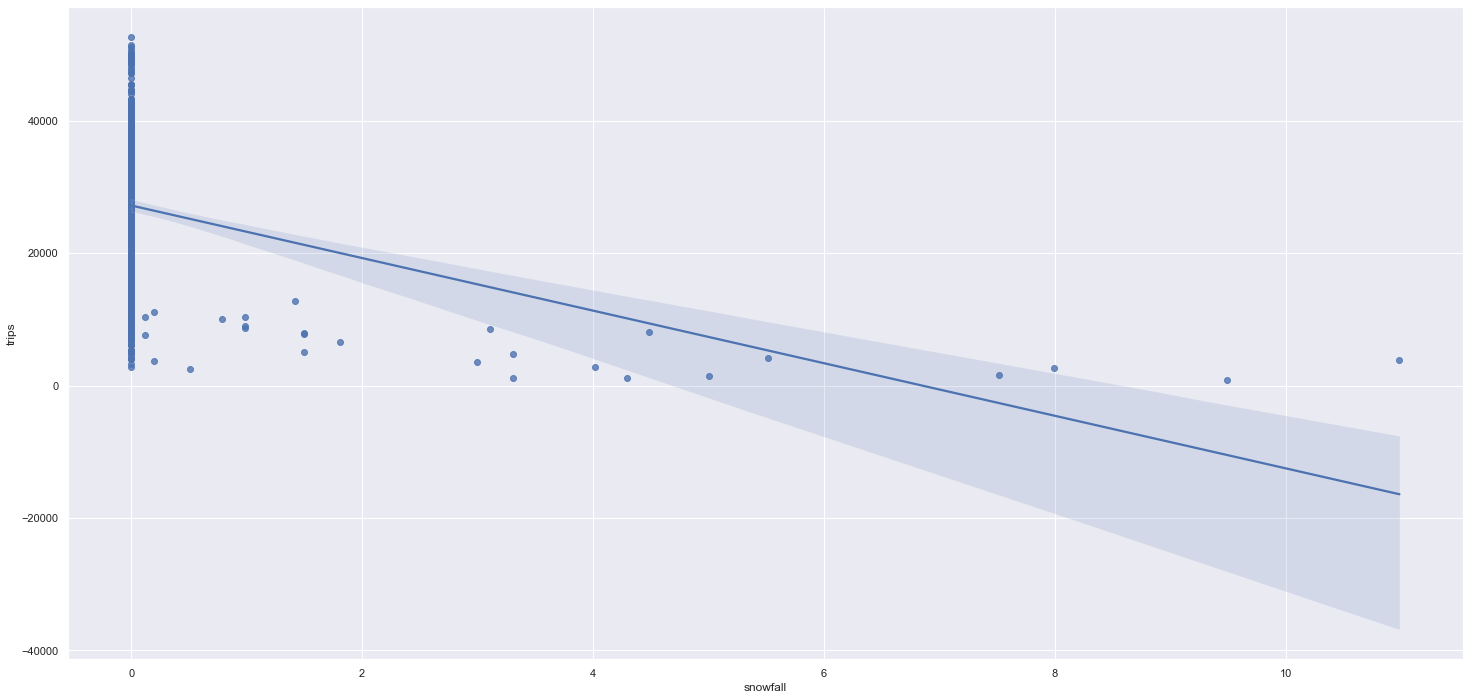

In [19]:
# Snowfall
sns.regplot(x='snowfall', y='trips', data=bikes_weekday, order =1) 

Degree : 2
R2:  0.10882131579510057

Degree : 3
R2:  0.11662212154395102

Degree : 4
R2:  0.12178221345691909


[Text(0.5, 1.0, 'Degree = 4')]

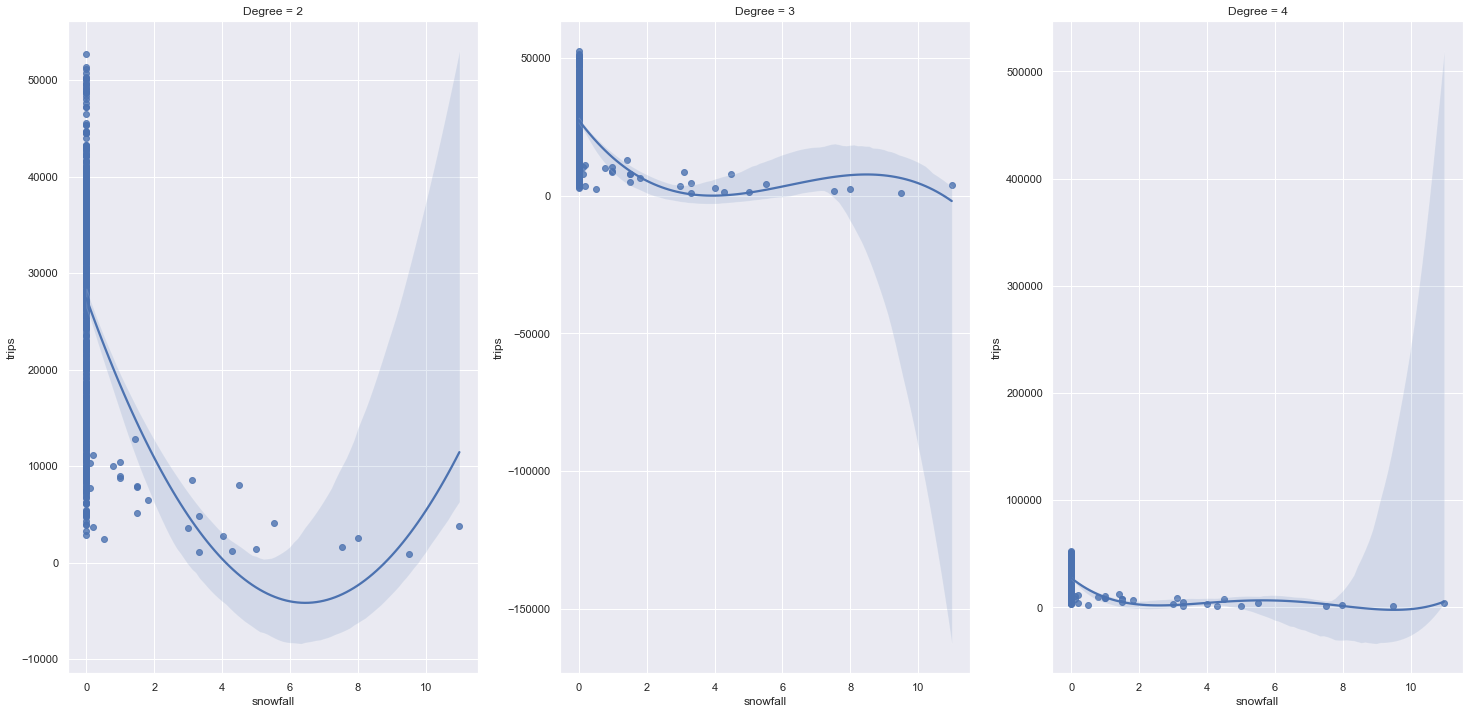

In [20]:
# Set X as the values for snowfall and y as the values for trips
X = np.array(bikes_weekday['snowfall']).reshape(-1, 1)
y = np.array(bikes_weekday['trips']).reshape(-1, 1)

#  Polynomial regression with degree 2
polynomial_features= PolynomialFeatures(degree = 2)
x2 = polynomial_features.fit_transform(X) # Transform X to degree 2
model2 = sm.OLS(y, x2).fit() # Fit the model with the transformed features
print("Degree : 2")
print("R2: ", model2.rsquared)
print()

#  Polynomial regression with degree 3
polynomial_features= PolynomialFeatures(degree = 3)
x3 = polynomial_features.fit_transform(X) # Transform X to degree 3
model3 = sm.OLS(y, x3).fit() # Fit the model with the transformed features
print("Degree : 3")
print("R2: ", model3.rsquared)
print()

#  Polynomial regression with degree 4
polynomial_features= PolynomialFeatures(degree = 4)
x4 = polynomial_features.fit_transform(X) # Transform X to degree 4
model4 = sm.OLS(y, x4).fit() # Fit the model with the transformed features
print("Degree : 4")
print("R2: ", model4.rsquared)

# Plot the results of polynomial regression
fig, axes = plt.subplots(1, 3)

sns.regplot(x='snowfall', y='trips', data=bikes_weekday, order =2, ax=axes[0]).set(title = "Degree = 2")
sns.regplot(x='snowfall', y='trips', data=bikes_weekday, order =3, ax=axes[1]).set(title = "Degree = 3")
sns.regplot(x='snowfall', y='trips', data=bikes_weekday, order =4, ax=axes[2]).set(title = "Degree = 4")


The trend is captured best when X is transformed to degree 4 since the R-squared values show a considerable increase from degree 3 to 4. This decision is also supported by the graphs plotted. (Fits most data points well)

<AxesSubplot:xlabel='snowfall', ylabel='trips'>

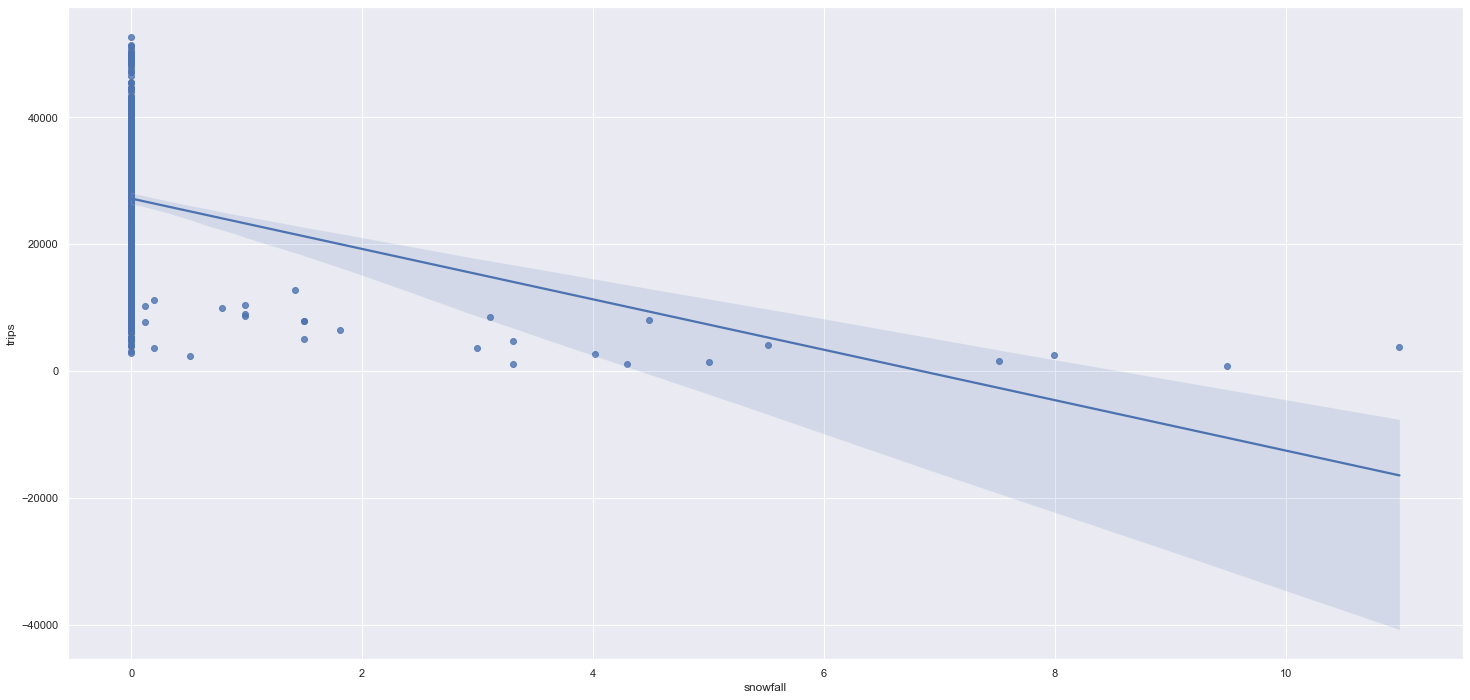

In [21]:
# Precipitation
sns.regplot(x='snowfall', y='trips', data=bikes_weekday, order =1) 

Degree : 2
R2:  0.0817749070470497

Degree : 3
R2:  0.0980748794108085

Degree : 4
R2:  0.10720588354768545


[Text(0.5, 1.0, 'Degree = 4')]

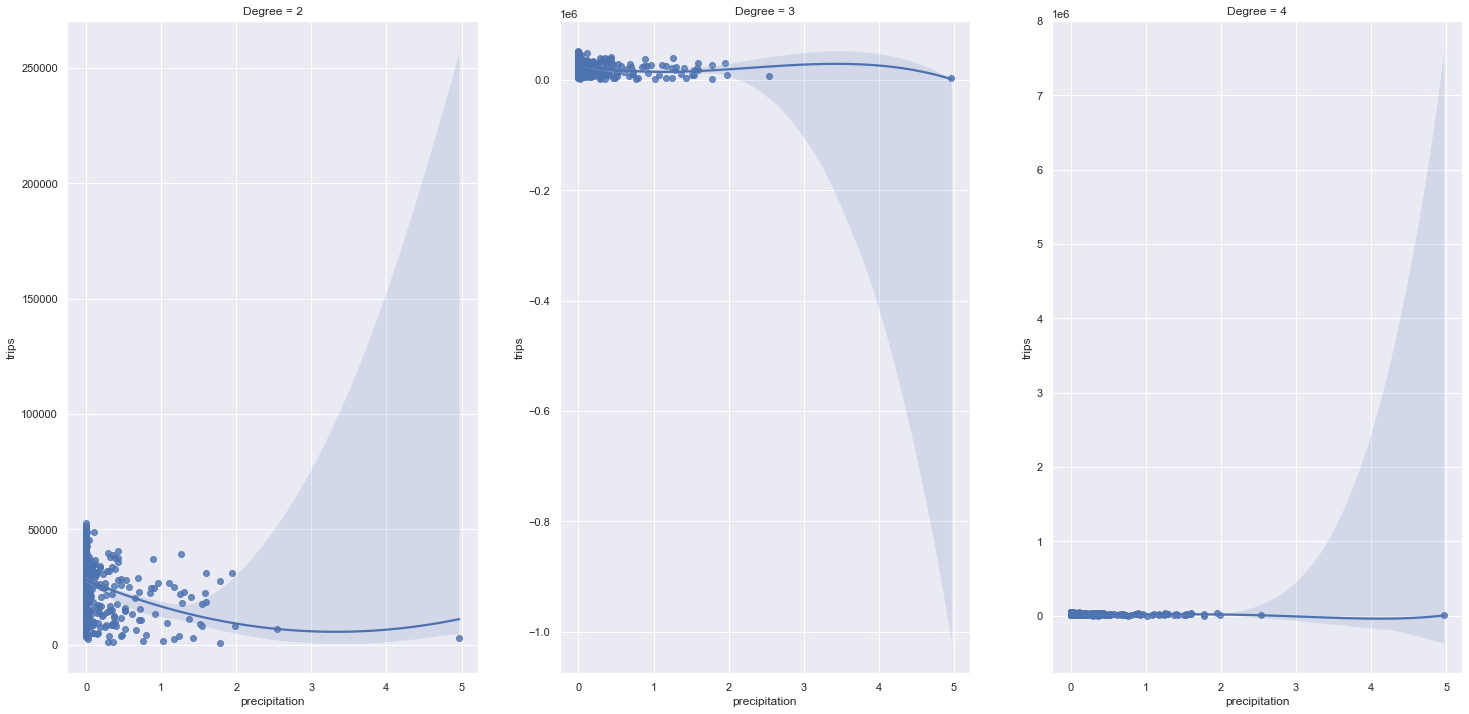

In [22]:
# Set X as the values for precipitation and y as the values for trips
X = np.array(bikes_weekday['precipitation']).reshape(-1, 1)
y = np.array(bikes_weekday['trips']).reshape(-1, 1)

#  Polynomial regression with degree 2
polynomial_features= PolynomialFeatures(degree = 2)
x2 = polynomial_features.fit_transform(X) # Transform X to degree 2
model2 = sm.OLS(y, x2).fit() # Fit the model with the transformed features
print("Degree : 2")
print("R2: ", model2.rsquared)
print()

#  Polynomial regression with degree 3
polynomial_features= PolynomialFeatures(degree = 3)
x3 = polynomial_features.fit_transform(X) # Transform X to degree 3
model3 = sm.OLS(y, x3).fit() # Fit the model with the transformed features
print("Degree : 3")
print("R2: ", model3.rsquared)
print()

#  Polynomial regression with degree 4
polynomial_features= PolynomialFeatures(degree = 4)
x4 = polynomial_features.fit_transform(X) # Transform X to degree 4
model4 = sm.OLS(y, x4).fit() # Fit the model with the transformed features
print("Degree : 4")
print("R2: ", model4.rsquared)

# Plot the results of polynomial regression
fig, axes = plt.subplots(1, 3)

sns.regplot(x='precipitation', y='trips', data=bikes_weekday, order =2, ax=axes[0]).set(title = "Degree = 2")
sns.regplot(x='precipitation', y='trips', data=bikes_weekday, order =3, ax=axes[1]).set(title = "Degree = 3")
sns.regplot(x='precipitation', y='trips', data=bikes_weekday, order =4, ax=axes[2]).set(title = "Degree = 4")

The trend is captured best when X is transformed to degree 4 since the R-squared values show a considerable increase from degree 3 to 4. This decision is also supported by the graphs plotted. (Fits most data points well)

d) Repeat 5)c) with the weekends dataset. Do you notice any differences? Justify your choices and include comment on your code.

<AxesSubplot:xlabel='max_temperature', ylabel='trips'>

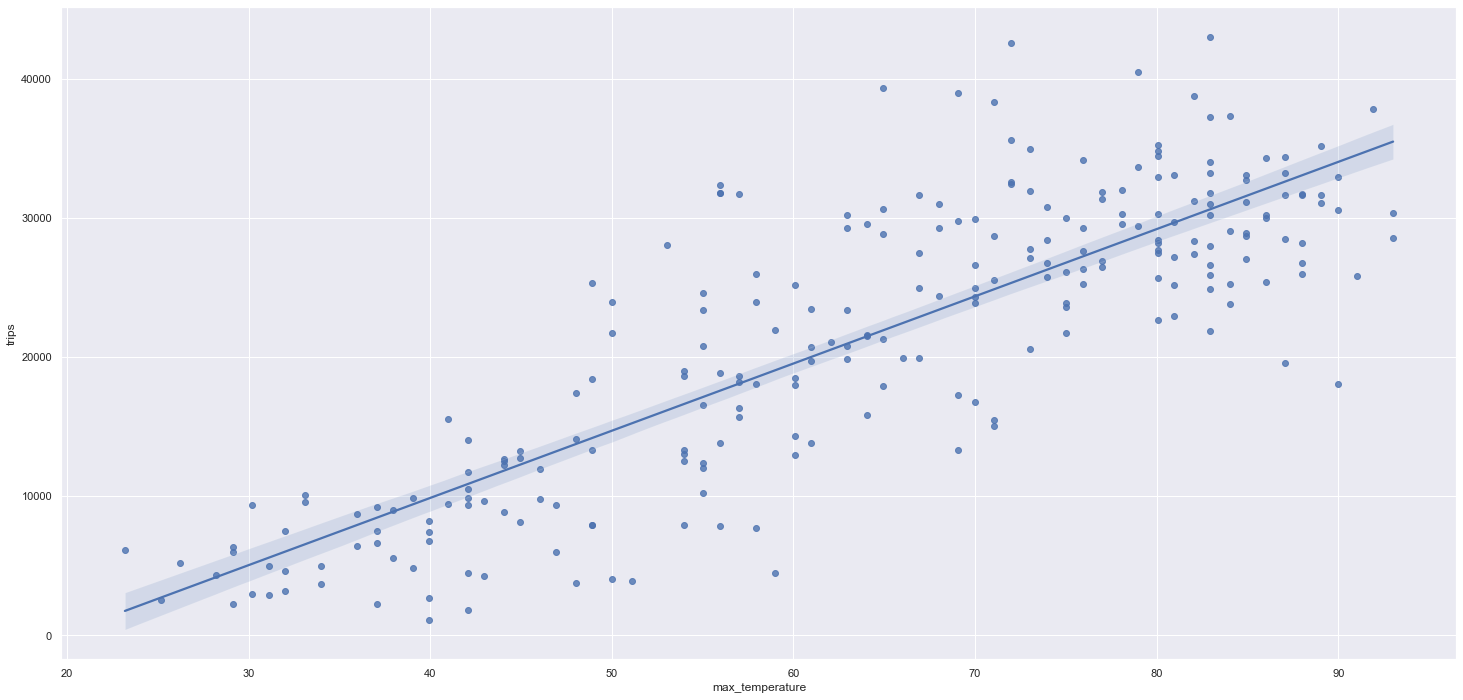

In [23]:
# Temperature 
sns.regplot(x='max_temperature', y='trips', data=bikes_weekend, order =1) 


Degree : 2
R2:  0.710805161908937

Degree : 3
R2:  0.7307133784278772

Degree : 4
R2:  0.7311104713619239


[Text(0.5, 1.0, 'Degree = 4')]

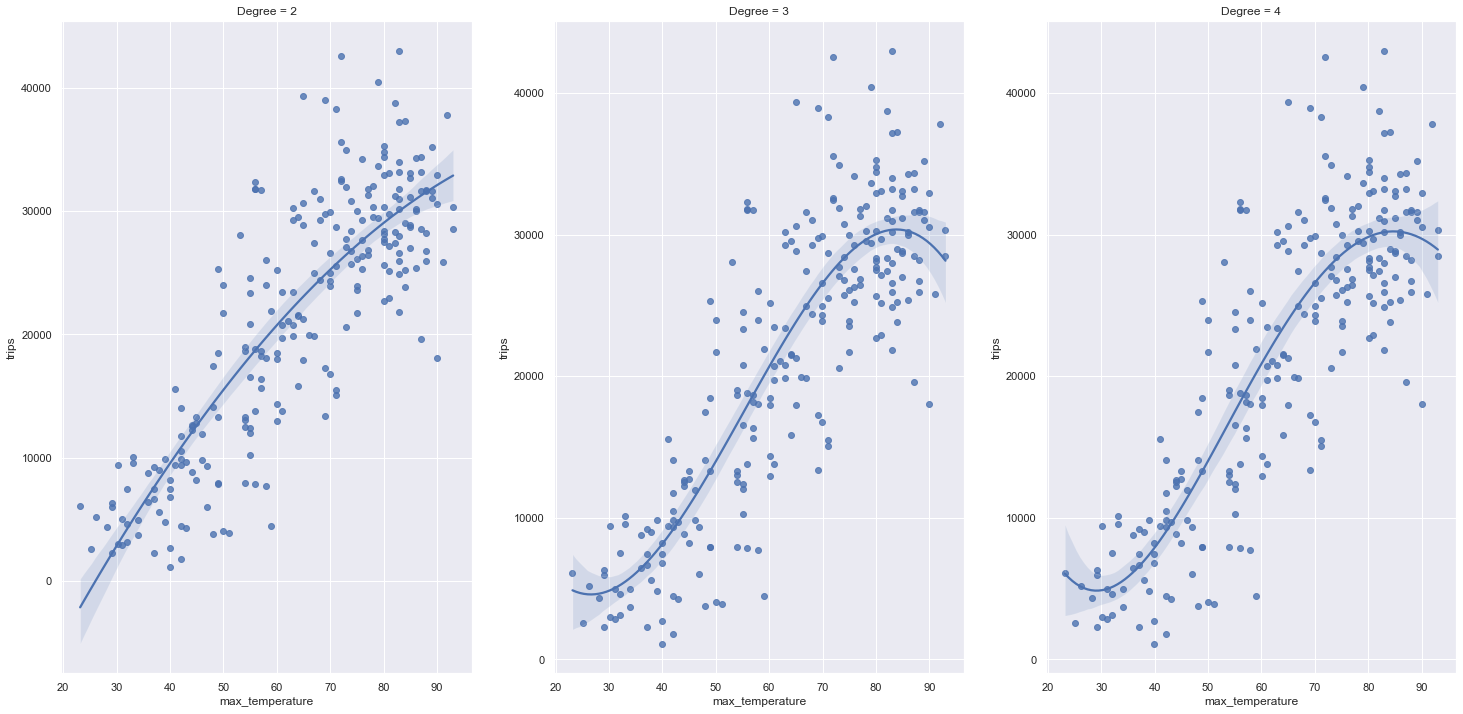

In [24]:
# Set X as the values for temperature and y as the values for trips
X = np.array(bikes_weekend['max_temperature']).reshape(-1, 1)
y = np.array(bikes_weekend['trips']).reshape(-1, 1)

#  Polynomial regression with degree 2
polynomial_features= PolynomialFeatures(degree = 2)
x2 = polynomial_features.fit_transform(X) # Transform X to degree 2
model2 = sm.OLS(y, x2).fit() # Fit the model with the transformed features
print("Degree : 2")
print("R2: ", model2.rsquared)
print()

#  Polynomial regression with degree 3
polynomial_features= PolynomialFeatures(degree = 3)
x3 = polynomial_features.fit_transform(X) # Transform X to degree 3
model3 = sm.OLS(y, x3).fit() # Fit the model with the transformed features
print("Degree : 3")
print("R2: ", model3.rsquared)
print()

#  Polynomial regression with degree 4
polynomial_features= PolynomialFeatures(degree = 4)
x4 = polynomial_features.fit_transform(X) # Transform X to degree 4
model4 = sm.OLS(y, x4).fit() # Fit the model with the transformed features
print("Degree : 4")
print("R2: ", model4.rsquared)

# Plot the models
fig, axes = plt.subplots(1, 3)

sns.regplot(x='max_temperature', y='trips', data=bikes_weekend, order =2, ax=axes[0]).set(title = "Degree = 2")
sns.regplot(x='max_temperature', y='trips', data=bikes_weekend, order =3, ax=axes[1]).set(title = "Degree = 3")
sns.regplot(x='max_temperature', y='trips', data=bikes_weekend, order =4, ax=axes[2]).set(title = "Degree = 4")


The trend is captured best when X is transformed to degree 3. There's not much difference between the R-squared values of degree 3 and 4. So 3 is chosen to avoid overfitting (as could happen with degree 4). This decision is also supported by the graphs plotted.

<AxesSubplot:xlabel='snowfall', ylabel='trips'>

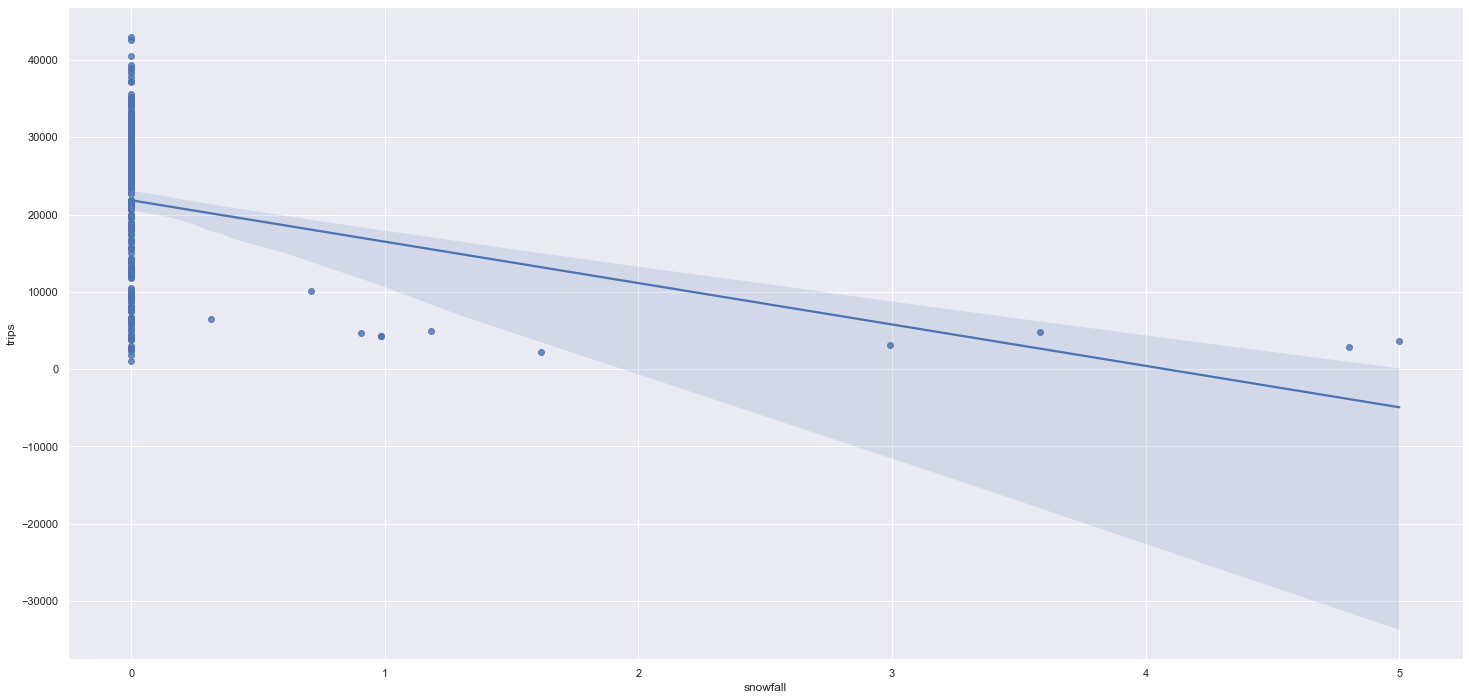

In [25]:
# Snowfall
sns.regplot(x='snowfall', y='trips', data=bikes_weekend, order =1) 

Degree : 2
R2:  0.11302084649947486

Degree : 3
R2:  0.12069331602121502

Degree : 4
R2:  0.12141415212338169


C:\Python38\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Python38\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Python38\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Python38\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Python38\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Python38\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Python38\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  b

[Text(0.5, 1.0, 'Degree = 4')]

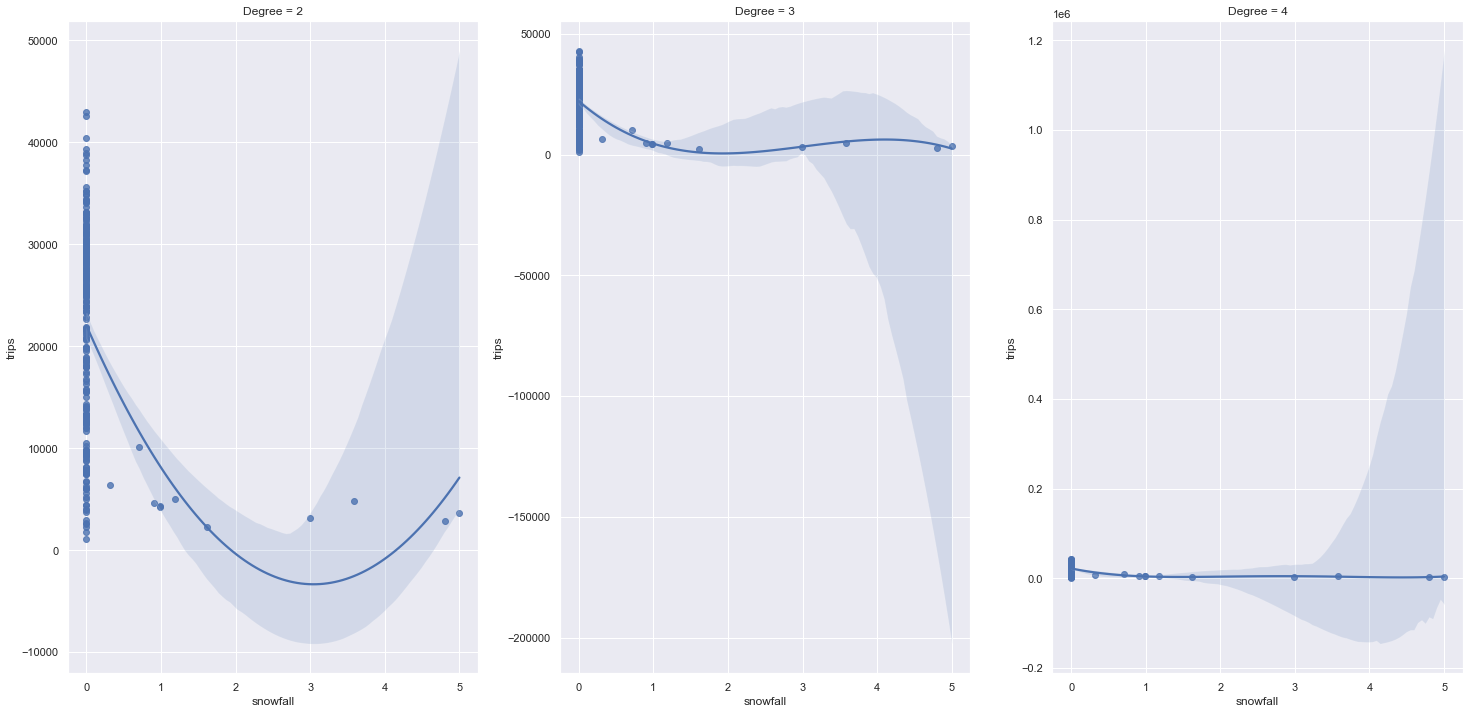

In [26]:
# Set X as the values for snowfall and y as the values for trips
X = np.array(bikes_weekend['snowfall']).reshape(-1, 1)
y = np.array(bikes_weekend['trips']).reshape(-1, 1)

#  Polynomial regression with degree 2
polynomial_features= PolynomialFeatures(degree = 2)
x2 = polynomial_features.fit_transform(X) # Transform X to degree 2
model2 = sm.OLS(y, x2).fit() # Fit the model with the transformed features
print("Degree : 2")
print("R2: ", model2.rsquared)
print()

#  Polynomial regression with degree 3
polynomial_features= PolynomialFeatures(degree = 3)
x3 = polynomial_features.fit_transform(X) # Transform X to degree 3
model3 = sm.OLS(y, x3).fit() # Fit the model with the transformed features
print("Degree : 3")
print("R2: ", model3.rsquared)
print()

#  Polynomial regression with degree 4
polynomial_features= PolynomialFeatures(degree = 4)
x4 = polynomial_features.fit_transform(X) # Transform X to degree 4
model4 = sm.OLS(y, x4).fit() # Fit the model with the transformed features
print("Degree : 4")
print("R2: ", model4.rsquared)

# Plot the models
fig, axes = plt.subplots(1, 3)

sns.regplot(x='snowfall', y='trips', data=bikes_weekend, order =2, ax=axes[0]).set(title = "Degree = 2")
sns.regplot(x='snowfall', y='trips', data=bikes_weekend, order =3, ax=axes[1]).set(title = "Degree = 3")
sns.regplot(x='snowfall', y='trips', data=bikes_weekend, order =4, ax=axes[2]).set(title = "Degree = 4")


The trend is captured best when X is transformed to degree 3. The model severely overfits when the degree is 4. This decision is also supported by the graphs plotted.

<AxesSubplot:xlabel='snowfall', ylabel='trips'>

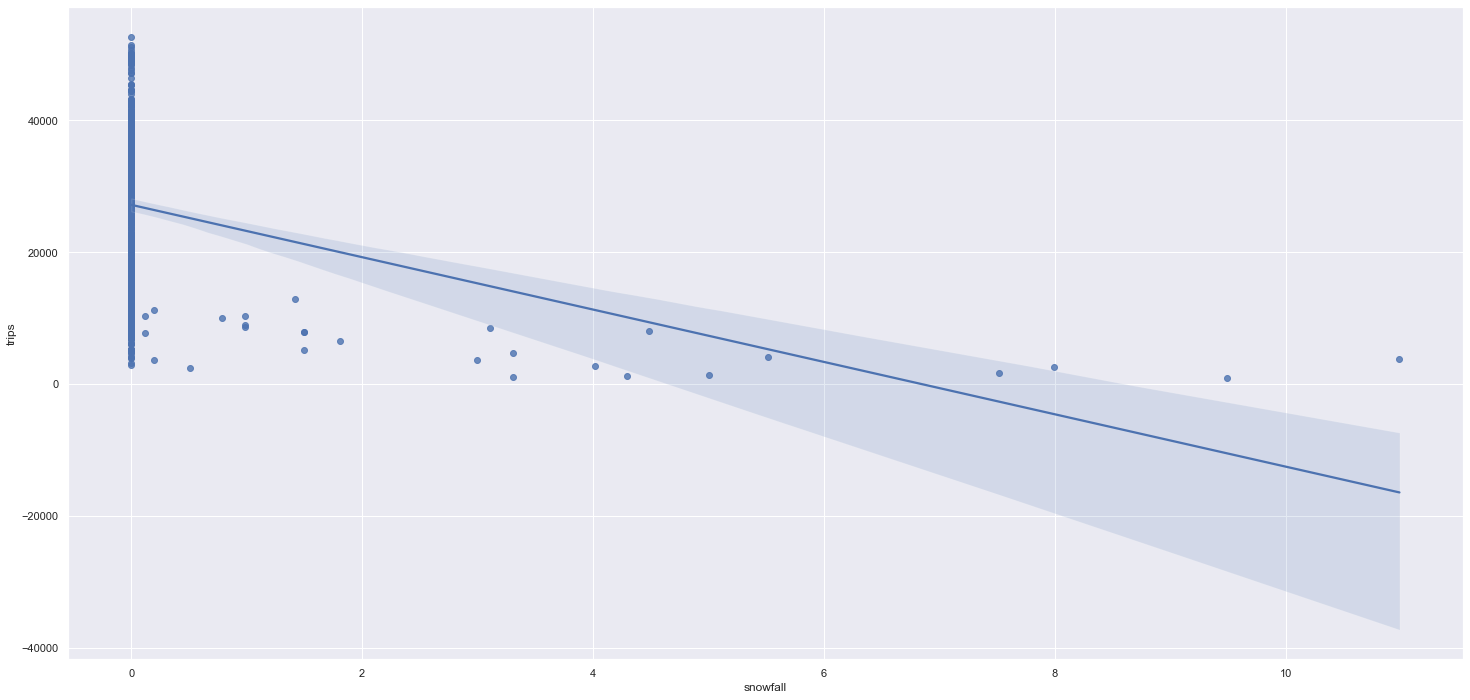

In [27]:
# Precipitation
sns.regplot(x='snowfall', y='trips', data=bikes_weekday, order =1) 

Degree : 2
R2:  0.10237882802780962

Degree : 3
R2:  0.10615870292062923

Degree : 4
R2:  0.10623466432708539


[Text(0.5, 1.0, 'Degree = 4')]

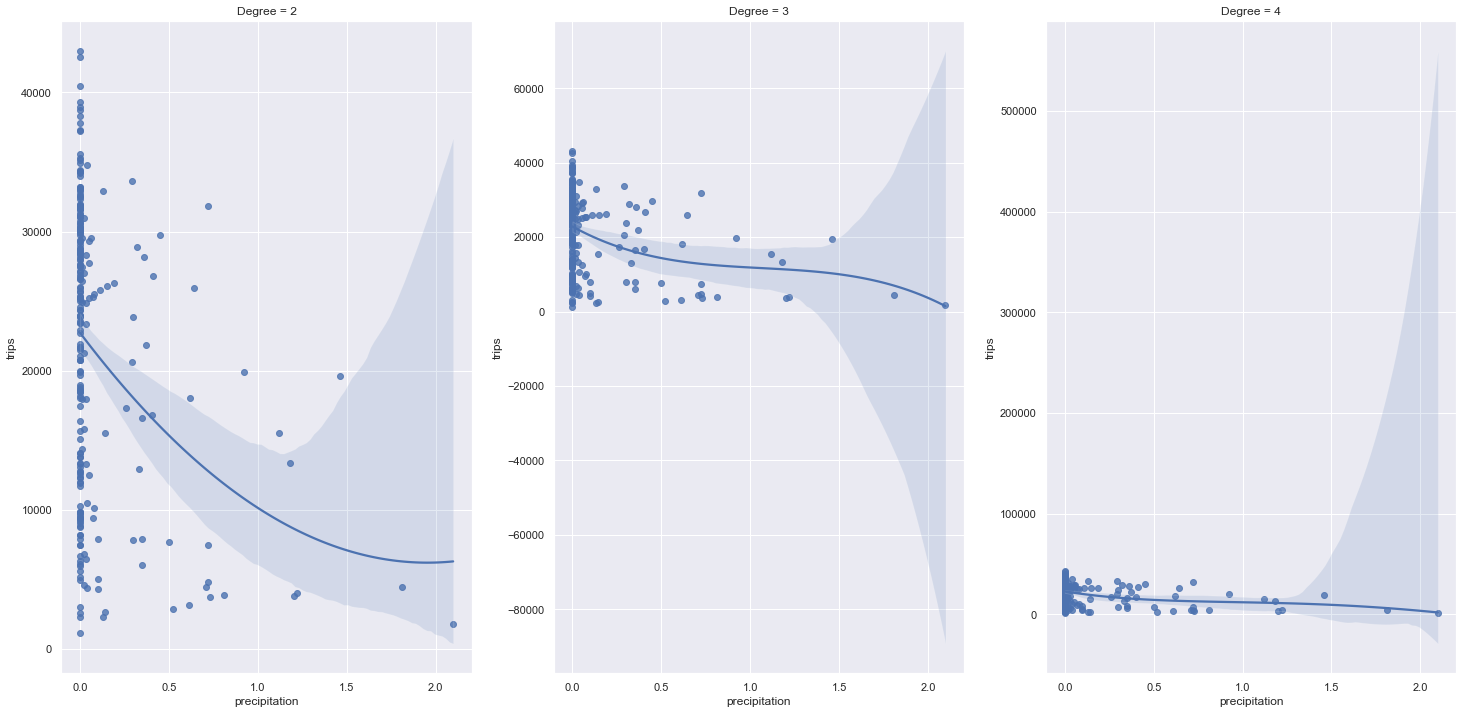

In [28]:
# Set X as the values for precipitation and y as the values for trips
X = np.array(bikes_weekend['precipitation']).reshape(-1, 1)
y = np.array(bikes_weekend['trips']).reshape(-1, 1)

#  Polynomial regression with degree 2
polynomial_features= PolynomialFeatures(degree = 2)
x2 = polynomial_features.fit_transform(X) # Transform X to degree 2
model2 = sm.OLS(y, x2).fit() # Fit the model with the transformed features
print("Degree : 2")
print("R2: ", model2.rsquared)
print()

#  Polynomial regression with degree 3
polynomial_features= PolynomialFeatures(degree = 3)
x3 = polynomial_features.fit_transform(X) # Transform X to degree 3
model3 = sm.OLS(y, x3).fit() # Fit the model with the transformed features
print("Degree : 3")
print("R2: ", model3.rsquared)
print()

#  Polynomial regression with degree 4
polynomial_features= PolynomialFeatures(degree = 4)
x4 = polynomial_features.fit_transform(X) # Transform X to degree 4
model4 = sm.OLS(y, x4).fit() # Fit the model with the transformed features
print("Degree : 4")
print("R2: ", model4.rsquared)

# Plot the models
fig, axes = plt.subplots(1, 3)

sns.regplot(x='precipitation', y='trips', data=bikes_weekend, order =2, ax=axes[0]).set(title = "Degree = 2")
sns.regplot(x='precipitation', y='trips', data=bikes_weekend, order =3, ax=axes[1]).set(title = "Degree = 3")
sns.regplot(x='precipitation', y='trips', data=bikes_weekend, order =4, ax=axes[2]).set(title = "Degree = 4")

The trend is captured best when X is transformed to degree 3. There's not much difference between the R-squared values of degree 3 and 4. So 3 is chosen to avoid overfitting (as could happen with degree 4). This decision is also supported by the graphs plotted.